                 TimeStamp  Ankle_acc_x  Ankle_acc_y  Ankle_acc_z  \
0  2018-07-04T12:04:17.738       -1.005        0.229       -0.083   
1  2018-07-04T12:04:17.791       -1.005        0.228       -0.082   
2  2018-07-04T12:04:17.837       -1.005        0.231       -0.079   
3  2018-07-04T12:04:17.885       -1.005        0.231       -0.079   
4  2018-07-04T12:04:17.945       -1.008        0.229       -0.072   

   Ankle_gyro_x  Ankle_gyro_y  Ankle_gyro_z  Subject  Activity  Trial  Tag  
0        -0.671         0.488        -2.683        1         1      1    7  
1        -3.415        -0.549         0.122        1         1      1    7  
2        -2.622        -1.402        -0.549        1         1      1    7  
3        -2.561        -2.195        -1.220        1         1      1    7  
4        -3.537        -2.073        -0.305        1         1      1    7  


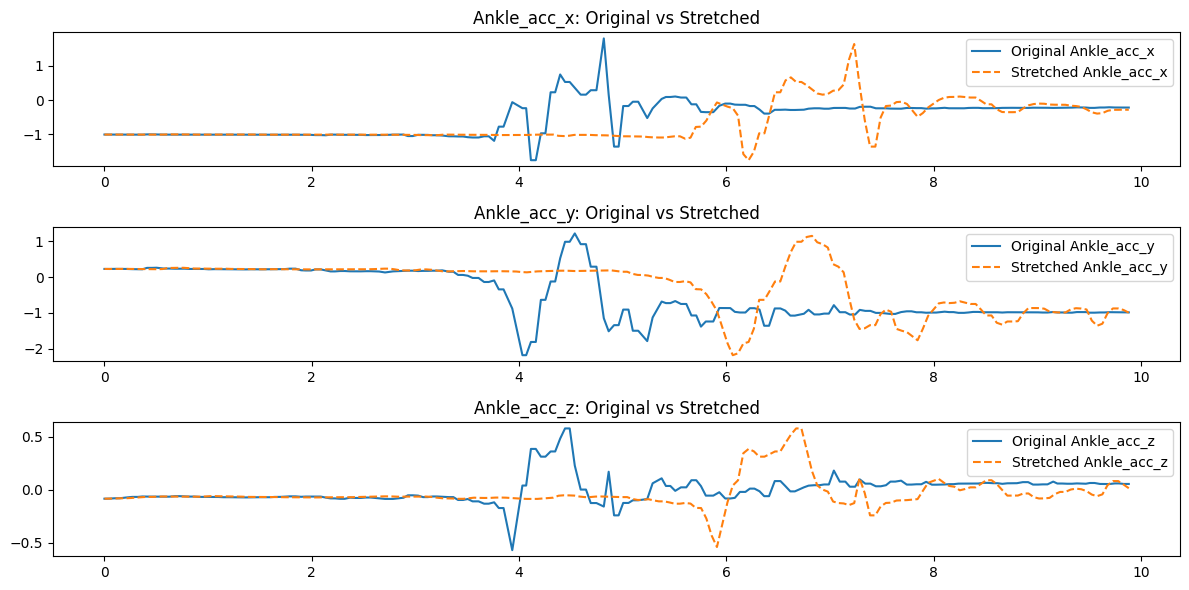

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load the data
ankle_path = 'PositionDatasets/Ankle_dataset.csv'
Ankle = pd.read_csv(ankle_path)

# Step 1: Filter the data where Subject=1, Activity=1, and Trial=1
subset = Ankle[(Ankle['Subject'] == 1) & (Ankle['Activity'] == 1) & (Ankle['Trial'] == 1)]

# Display the first few rows to understand the structure
print(subset.head())

# Step 2: Choose relevant columns for warping (e.g., accelerometer data)
# Let's use the accelerometer data (Ankle_acc_x, Ankle_acc_y, Ankle_acc_z) for this example
t_original = pd.to_datetime(subset['TimeStamp'])  # Convert timestamp to datetime if necessary
t_original = (t_original - t_original.min()).dt.total_seconds()  # Convert time to seconds
y_original_x = subset['Ankle_acc_x'].values
y_original_y = subset['Ankle_acc_y'].values
y_original_z = subset['Ankle_acc_z'].values

# Step 3: Stretch the time series by a factor (e.g., 1.5)
def time_stretch(t, stretch_factor=2):
    """
    Stretch the time series by a constant factor.
    :param t: Original time series (array of time points)
    :param stretch_factor: Factor by which to stretch the time axis
    :return: New stretched time series
    """
    return t * stretch_factor  # Stretch the time axis by the factor

# Step 4: Apply time stretching
t_stretched = time_stretch(t_original, stretch_factor=1.5)  # Stretch by 1.5x

# Step 5: Interpolate the stretched time series (for all axes)
interpolator_x = interp1d(t_stretched, y_original_x, kind='linear', fill_value="extrapolate")
interpolator_y = interp1d(t_stretched, y_original_y, kind='linear', fill_value="extrapolate")
interpolator_z = interp1d(t_stretched, y_original_z, kind='linear', fill_value="extrapolate")

# Generate new time points to evaluate the stretched series
t_new = np.linspace(t_original.min(), t_original.max(), len(t_original))  # Keep the same number of samples

# Evaluate the interpolated stretched time series for each axis
y_stretched_x = interpolator_x(t_new)
y_stretched_y = interpolator_y(t_new)
y_stretched_z = interpolator_z(t_new)

# Step 6: Visualize the results
plt.figure(figsize=(12, 6))

# Plot Ankle_acc_x (x-axis acceleration)
plt.subplot(3, 1, 1)
plt.plot(t_original, y_original_x, label='Original Ankle_acc_x')
plt.plot(t_new, y_stretched_x, label='Stretched Ankle_acc_x', linestyle='--')
plt.legend()
plt.title('Ankle_acc_x: Original vs Stretched')

# Plot Ankle_acc_y (y-axis acceleration)
plt.subplot(3, 1, 2)
plt.plot(t_original, y_original_y, label='Original Ankle_acc_y')
plt.plot(t_new, y_stretched_y, label='Stretched Ankle_acc_y', linestyle='--')
plt.legend()
plt.title('Ankle_acc_y: Original vs Stretched')

# Plot Ankle_acc_z (z-axis acceleration)
plt.subplot(3, 1, 3)
plt.plot(t_original, y_original_z, label='Original Ankle_acc_z')
plt.plot(t_new, y_stretched_z, label='Stretched Ankle_acc_z', linestyle='--')
plt.legend()
plt.title('Ankle_acc_z: Original vs Stretched')

plt.tight_layout()
plt.show()
